# Knowledge graph homework, Creating an E-commerce Ontology

###  This work was made by:  

##`Mattéo Boissier`,  `Hugo Caetano`,  `Louis Couput` and `Julien Séailles`

# A Brief description of our Ontology



## 1. Our choice

In order to conduct our work on creating an e-commerce ontology, we have choosen to focus on the Cap sector. 

### a) A brief presentation of the cap :

A cap is a type of headwear, typically designed to provide protection, shade, or style for the wearer. It consists of a rounded crown and a brim, which shields the eyes and face from sunlight or other elements. Caps are made from various materials, including fabric, leather, and synthetic materials, and come in a diverse range of colors, patterns, and styles. They can also serve as a medium for expressing individuality, team affiliation, or brand loyalty.

In the context of an e-commerce platform, caps represent a popular and versatile product category, catering to a wide range of customers with different preferences and needs. By creating an ontology for caps, we can systematically organize and classify the various types and characteristics of caps, enabling a seamless shopping experience for customers while helping sellers manage their cap inventory more effectively.

### b) the creation of the ontology

In order to create our ontology, we created this turtle file to be able to visualize our system. Because ontology needs to use often `.owl` or `.ttl` files we will start by importing the different libraries `rdflib` and `pydot` to visualize the graphs



In [1]:
#importing librairies
!pip install rdflib
!pip install pydot
import shutil
import os
import rdflib
from rdflib.tools.rdf2dot import rdf2dot
from graphviz import Source
from io import StringIO
from IPython.display import SVG, display
from google.colab import files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Underneath this text, you would be able to find the turtle code that describe our ontology, at the end we also managed to add different examples of how our ontology could be used, in order to test graph queries within the notebook and visualize the graph with *'real'* data

In [2]:
turtle_code = '''


@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix gr: <http://purl.org/goodrelations/v1#> .
@prefix cap: <http://example.org/caps#> .
@prefix schema: <http://schema.org/> .
@prefix ex: <http://example.org/instance/> .


cap:Cap a rdfs:Class ;
    rdfs:subClassOf gr:ProductOrServiceModel ;
    rdfs:label "Cap" ;
    rdfs:comment "A type of headwear designed for various purposes, such as fashion, protection from the sun, or as part of a uniform." .

cap:BaseballCap a rdfs:Class ;
    rdfs:subClassOf cap:Cap ;
    rdfs:label "Baseball Cap" ;
    rdfs:comment "A type of cap with a rounded crown and a stiff bill projecting in front." .

cap:Beanie a rdfs:Class ;
    rdfs:subClassOf cap:Cap ;
    rdfs:label "Beanie" ;
    rdfs:comment "A type of cap that fits closely to the head, usually made of a knit material." .

cap:FlatCap a rdfs:Class ;
    rdfs:subClassOf cap:Cap ;
    rdfs:label "Flat Cap" ;
    rdfs:comment "A type of cap with a rounded, flat crown and a short, stiff brim in front." .

cap:SnapbackCap a rdfs:Class ;
    rdfs:subClassOf cap:Cap ;
    rdfs:label "Snapback Cap" ;
    rdfs:comment "A type of cap with a flat, wide brim and an adjustable snap closure at the back." .

cap:BucketHat a rdfs:Class ;
    rdfs:subClassOf cap:Cap ;
    rdfs:label "Bucket Hat" ;
    rdfs:comment "A type of hat with a wide, downward-sloping brim and a soft, rounded crown." .

cap:Visor a rdfs:Class ;
    rdfs:subClassOf cap:Cap ;
    rdfs:label "Visor" ;
    rdfs:comment "A type of cap with a wide brim in front to shield the eyes from the sun." .

cap:brimType a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Brim Type" ;
    rdfs:comment "The type of brim on a cap, such as flat or curved." ;
    rdfs:domain cap:Cap ;
    rdfs:range xsd:string .

cap:crownHeight a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Crown Height" ;
    rdfs:comment "The height of the crown on a cap, such as high, mid, or low profile." ;
    rdfs:domain cap:Cap ;
    rdfs:range xsd:string .

cap:CapSize a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Cap Size" ;
    rdfs:comment "The size of a cap, such as small, medium, or large." ;
    rdfs:domain cap:Cap ;
    rdfs:range xsd:string .

cap:CapColor a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Cap Color" ;
    rdfs:comment "The color of a cap, such as red, blue, or black." ;
    rdfs:domain cap:Cap ;
    rdfs:range xsd:string .

cap:CapMaterial a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Cap Material" ;
    rdfs:comment "The material of a cap, such as cotton, polyester, or wool." ;
    rdfs:domain cap:Cap ;
    rdfs:range xsd:string .

cap:InstallmentPriceSpecification a rdfs:Class ;
    rdfs:subClassOf gr:PriceSpecification ;
    rdfs:label "Installment Price Specification" ;
    rdfs:comment "A price specification for offerings with multiple payment installments." .

cap:installments a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Installments" ;
    rdfs:comment "The number of installments for a multiple payment option." ;
    rdfs:domain cap:InstallmentPriceSpecification ;
    rdfs:range xsd:integer .

cap:installmentAmount a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Installment Amount" ;
    rdfs:comment "The amount to be paid in each installment for a multiple payment option." ;
    rdfs:domain cap:InstallmentPriceSpecification ;
    rdfs:range xsd:float .

cap:CapDelivery a rdfs:Class ;
    rdfs:subClassOf gr:DeliveryMethod ;
    rdfs:label "Cap Delivery" .

cap:closureType a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Closure Type" ;
    rdfs:comment "The type of closure used in a cap, such as snapback, buckle, or fitted." ;
    rdfs:domain cap:Cap ;
    rdfs:range xsd:string .

cap:CapStyle a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Cap Style" ;
    rdfs:comment "The specific style of a cap, such as trucker, flat-brim, or dad cap." ;
    rdfs:domain cap:Cap ;
    rdfs:range xsd:string .

cap:LogoDesign a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Logo Design" ;
    rdfs:comment "The design or logo featured on a cap." ;
    rdfs:domain cap:Cap ;
    rdfs:range xsd:string .

cap:CapDeliveryMethod a rdfs:Class ;
    rdfs:subClassOf gr:DeliveryMethod ;
    rdfs:label "Cap Delivery Method" ;
    rdfs:comment "The specific delivery method for caps, such as standard shipping, expedited shipping, or pickup in-store." .

cap:deliveryRange a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Delivery Range" ;
    rdfs:comment "The geographical range within which a cap can be delivered, such as local, national, or international." ;
    rdfs:domain cap:CapDeliveryMethod ;
    rdfs:range xsd:string .

cap:deliveryTime a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Delivery Time" ;
    rdfs:comment "The estimated delivery time for a cap, in days." ;
    rdfs:domain cap:CapDeliveryMethod ;
    rdfs:range xsd:integer .

cap:deliveryCost a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Delivery Cost" ;
    rdfs:comment "The cost of the delivery method for a cap, in the currency of the country where the product is sold." ;
    rdfs:domain cap:CapDeliveryMethod ;
    rdfs:range xsd:float .

cap:CapManufacturer a rdfs:Class ;
    rdfs:subClassOf gr:BusinessEntity ;
    rdfs:label "Cap Manufacturer" ;
    rdfs:comment "The company or entity that manufactures the cap." .

cap:manufacturer a rdf:Property ;
    rdfs:subPropertyOf gr:qualitativeProductOrServiceProperty ;
    rdfs:label "Manufacturer" ;
    rdfs:comment "The manufacturer of a cap." ;
    rdfs:domain cap:Cap ;
    rdfs:range cap:CapManufacturer .

cap:CapOffer a rdfs:Class ;
    rdfs:subClassOf gr:Offering ;
    rdfs:label "Cap Offer" ;
    rdfs:comment "An offer for a cap or combination of caps." .

cap:offerPrice a rdf:Property ;
    rdfs:subPropertyOf gr:hasPriceSpecification ;
    rdfs:label "Offer Price" ;
    rdfs:comment "The price of the cap offer." ;
    rdfs:domain cap:CapOffer ;
    rdfs:range xsd:float .

cap:offerCurrency a rdf:Property ;
    rdfs:subPropertyOf gr:hasPriceSpecification ;
    rdfs:label "Offer Currency" ;
    rdfs:comment "The currency of the cap offer price." ;
    rdfs:domain cap:CapOffer ;
    rdfs:range xsd:string .

cap:offerWarranty a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Offer Warranty" ;
    rdfs:comment "The warranty information for the cap offer, in months or years." ;
    rdfs:domain cap:CapOffer ;
    rdfs:range xsd:string .

cap:offerShippingDetails a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Offer Shipping Details" ;
    rdfs:comment "The shipping details for the cap offer, such as shipping method, delivery time, and cost." ;
    rdfs:domain cap:CapOffer ;
    rdfs:range cap:CapDeliveryMethod .

cap:offeredProduct a rdf:Property ;
    rdfs:subPropertyOf gr:includesObject ;
    rdfs:label "Offered Product" ;
    rdfs:comment "The cap or caps included in the offer." ;
    rdfs:domain cap:CapOffer ;
    rdfs:range cap:Cap .

cap:offerStartDate a rdf:Property ;
    rdfs:subPropertyOf gr:validFrom ;
    rdfs:label "Offer Start Date" ;
    rdfs:comment "The start date of the cap offer." ;
    rdfs:domain cap:CapOffer ;
    rdfs:range xsd:date .

cap:offerEndDate a rdf:Property ;
    rdfs:subPropertyOf gr:validThrough ;
    rdfs:label "Offer End Date" ;
    rdfs:comment "The end date of the cap offer." ;
    rdfs:domain cap:CapOffer ;
    rdfs:range xsd:date .

cap:CapDeliveryMethod a rdfs:Class ;
    rdfs:subClassOf gr:DeliveryMethod ;
    rdfs:label "Cap Delivery Method" ;
    rdfs:comment "A method for delivering caps." .

cap:deliveryTime a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Delivery Time" ;
    rdfs:comment "The estimated time for the delivery of the cap, in days." ;
    rdfs:domain cap:CapDeliveryMethod ;
    rdfs:range xsd:integer .

cap:deliveryCost a rdf:Property ;
    rdfs:subPropertyOf gr:hasPriceSpecification ;
    rdfs:label "Delivery Cost" ;
    rdfs:comment "The cost of delivering the cap." ;
    rdfs:domain cap:CapDeliveryMethod ;
    rdfs:range xsd:float .

cap:deliveryCurrency a rdf:Property ;
    rdfs:subPropertyOf gr:hasPriceSpecification ;
    rdfs:label "Delivery Currency" ;
    rdfs:comment "The currency of the delivery cost." ;
    rdfs:domain cap:CapDeliveryMethod ;
    rdfs:range xsd:string .

cap:deliveryService a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Delivery Service" ;
    rdfs:comment "The service or company responsible for the delivery of the cap." ;
    rdfs:domain cap:CapDeliveryMethod ;
    rdfs:range xsd:string .

cap:CapTransaction a rdfs:Class ;
    rdfs:subClassOf gr:BusinessFunction ;
    rdfs:label "Cap Transaction" ;
    rdfs:comment "A transaction involving the purchase of a cap." .

cap:transactionDate a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Transaction Date" ;
    rdfs:comment "The date when the cap transaction took place." ;
    rdfs:domain cap:CapTransaction ;
    rdfs:range xsd:date .

cap:transactionAmount a rdf:Property ;
    rdfs:subPropertyOf gr:hasPriceSpecification ;
    rdfs:label "Transaction Amount" ;
    rdfs:comment "The total amount paid in the cap transaction." ;
    rdfs:domain cap:CapTransaction ;
    rdfs:range xsd:float .

cap:transactionCurrency a rdf:Property ;
    rdfs:subPropertyOf gr:hasPriceSpecification ;
    rdfs:label "Transaction Currency" ;
    rdfs:comment "The currency of the transaction amount." ;
    rdfs:domain cap:CapTransaction ;
    rdfs:range xsd:string .

cap:buyer a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Buyer" ;
    rdfs:comment "The buyer involved in the cap transaction." ;
    rdfs:domain cap:CapTransaction ;
    rdfs:range schema:Person .

cap:seller a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Seller" ;
    rdfs:comment "The seller involved in the cap transaction." ;
    rdfs:domain cap:CapTransaction ;
    rdfs:range schema:Organization .

cap:CapBuyer a rdfs:Class ;
    rdfs:subClassOf schema:Person ;
    rdfs:label "Cap Buyer" ;
    rdfs:comment "A person who buys caps." .

cap:buyerID a rdf:Property ;
    rdfs:subPropertyOf schema:identifier ;
    rdfs:label "Buyer ID" ;
    rdfs:comment "A unique identifier for the cap buyer." ;
    rdfs:domain cap:CapBuyer ;
    rdfs:range xsd:string .

cap:CapSeller a rdfs:Class ;
    rdfs:subClassOf schema:Organization ;
    rdfs:label "Cap Seller" ;
    rdfs:comment "An organization that sells caps." .

cap:sellerID a rdf:Property ;
    rdfs:subPropertyOf schema:identifier ;
    rdfs:label "Seller ID" ;
    rdfs:comment "A unique identifier for the cap seller." ;
    rdfs:domain cap:CapSeller ;
    rdfs:range xsd:string .














ex:blueSnapback rdf:type cap:SnapbackCap ;
    cap:CapSize "M" ;
    cap:CapColor "Blue" ;
    cap:CapMaterial "Cotton" ;
    cap:closureType "Snapback" ;
    cap:CapStyle "Flat-brim" ;
    cap:LogoDesign "ExampleLogo" ;
    cap:manufacturer ex:exampleCapManufacturer ;
    cap:brimType "Flat" ;
    cap:crownHeight "High" .

ex:exampleCapManufacturer rdf:type cap:CapManufacturer ;
    schema:name "Example Cap Manufacturer" ;
    schema:location "USA" .

ex:capOffer1 rdf:type cap:CapOffer ;
    cap:offeredProduct ex:blueSnapback ;
    cap:offerPrice "26" ;
    cap:offerCurrency "USD" ;
    cap:offerWarranty "1 Year" ;
    cap:offerShippingDetails ex:standardShipping ;
    cap:offerStartDate "2023-04-20"^^xsd:date ;
    cap:offerEndDate "2023-04-30"^^xsd:date .

ex:standardShipping rdf:type cap:CapDeliveryMethod ;
    cap:deliveryTime "5" ;
    cap:deliveryCost "4.99" ;
    cap:deliveryCurrency "USD" ;
    cap:deliveryService "Standard Shipping" ;
    cap:deliveryRange "National" .

ex:buyer3 rdf:type cap:CapBuyer ;
    schema:name "John Doe" ;
    cap:buyerID "buyer123" .

ex:seller3 rdf:type cap:CapSeller ;
    schema:name "Caps R Us" ;
    cap:sellerID "seller456" .

ex:transaction3 rdf:type cap:CapTransaction ;
    cap:transactionDate "2023-04-21"^^xsd:date ;
    cap:transactionAmount "30.98" ;
    cap:transactionCurrency "USD" ;
    cap:buyer ex:buyer3 ;
    cap:seller ex:seller3 .

cap:cap1 a cap:BaseballCap ;
    cap:CapSize "Medium" ;
    cap:CapColor "Red" ;
    cap:CapColor "Blue" ;
    cap:CapMaterial "Cotton" ;
    cap:CapMaterial "Polyester" ;
    cap:closureType "Snapback" ;
    cap:LogoDesign "Team A" ;
    cap:brimType "Curved" ;
    cap:crownHeight "Mid" .

cap:cap2 a cap:SnapbackCap ;
    cap:CapSize "Large" ;
    cap:CapColor "Black" ;
    cap:CapMaterial "Wool" ;
    cap:closureType "Snapback" ;
    cap:LogoDesign "Team B" ;
    cap:brimType "Flat" ;
    cap:crownHeight "High" .

cap:capManufacturer1 a cap:CapManufacturer ;
    rdfs:label "Cap Manufacturer A" .

cap:cap1 cap:manufacturer cap:capManufacturer1 .
cap:cap2 cap:manufacturer cap:capManufacturer1 .

cap:offer1 a cap:CapOffer ;
    cap:offerPrice "30.00" ;
    cap:offerCurrency "USD" ;
    cap:offerWarranty "1 Year" ;
    cap:offerStartDate "2023-04-20" ;
    cap:offerEndDate "2023-05-20" .

cap:offer1 cap:offeredProduct cap:cap1 ;
           cap:offeredProduct cap:cap2 .

cap:deliveryMethod1 a cap:CapDeliveryMethod ;
    cap:deliveryTime "3" ;
    cap:deliveryCost "5.00" ;
    cap:deliveryCurrency "USD" ;
    cap:deliveryService "Standard Shipping" .

cap:offer1 cap:offerShippingDetails cap:deliveryMethod1 .

cap:buyer1 a cap:CapBuyer ;
    cap:buyerID "buyer001" .

cap:seller1 a cap:CapSeller ;
    cap:sellerID "seller001" .

cap:transaction1 a cap:CapTransaction ;
    cap:transactionDate "2023-04-21" ;
    cap:transactionAmount "35.00" ;
    cap:transactionCurrency "USD" ;
    cap:buyer cap:buyer1 ;
    cap:seller cap:seller2 .

cap:cap3 a cap:TruckerCap ;
    cap:CapSize "Small" ;
    cap:CapColor "Green" ;
    cap:CapMaterial "Cotton" ;
    cap:CapMaterial "Mesh" ;
    cap:closureType "Snapback" ;
    cap:LogoDesign "Outdoor Adventures" .

cap:cap4 a cap:Beanie ;
    cap:CapSize "One Size" ;
    cap:CapColor "Grey" ;
    cap:CapMaterial "Acrylic" ;
    cap:LogoDesign "Mountaineering Club" .

cap:capManufacturer2 a cap:CapManufacturer ;
    rdfs:label "Cap Manufacturer B" .

cap:cap3 cap:manufacturer cap:capManufacturer2 .
cap:cap4 cap:manufacturer cap:capManufacturer2 .

cap:offer2 a cap:CapOffer ;
    cap:offerPrice "25.00" ;
    cap:offerCurrency "USD" ;
    cap:offerWarranty "6 Months" ;
    cap:offerStartDate "2023-04-25" ;
    cap:offerEndDate "2023-06-30" .

cap:offer2 cap:offeredProduct cap:cap3 ;
           cap:offeredProduct cap:cap4 .

cap:deliveryMethod2 a cap:CapDeliveryMethod ;
    cap:deliveryTime "1" ;
    cap:deliveryCost "10.00" ;
    cap:deliveryCurrency "USD" ;
    cap:deliveryService "Express Shipping" .

cap:offer2 cap:offerShippingDetails cap:deliveryMethod2 .

cap:buyer2 a cap:CapBuyer ;
    cap:buyerID "buyer002" .

cap:seller2 a cap:CapSeller ;
    cap:sellerID "seller002" .

cap:transaction2 a cap:CapTransaction ;
    cap:transactionDate "2023-04-27" ;
    cap:transactionAmount "35.00" ;
    cap:transactionCurrency "USD" ;
    cap:buyer cap:buyer2 ;
    cap:seller cap:seller2 .

ex:installmentPriceSpec1 rdf:type cap:InstallmentPriceSpecification ;
    cap:installments 10 ;
    cap:installmentAmount 2.60 ;
    cap:hasCurrency "USD" .

ex:installmentPriceSpec2 rdf:type cap:InstallmentPriceSpecification ;
    cap:installments 6 ;
    cap:installmentAmount 5.20 ;
    cap:hasCurrency "USD" .

ex:capOffer1 cap:hasInstallmentOption ex:installmentPriceSpec1 .
ex:capOffer1 cap:hasInstallmentOption ex:installmentPriceSpec2 .

cap:hasInstallmentOption a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Has Installment Option" ;
    rdfs:comment "The installment price specification for a multiple payment option." ;
    rdfs:domain cap:CapOffer ;
    rdfs:range cap:InstallmentPriceSpecification .

cap:hasCurrency a rdf:Property ;
    rdfs:subPropertyOf gr:quantitativeProductOrServiceProperty ;
    rdfs:label "Has Currency" ;
    rdfs:comment "The currency for the installment amount in a multiple payment option." ;
    rdfs:domain cap:InstallmentPriceSpecification ;
    rdfs:range xsd:string .
'''


In [3]:
graph = rdflib.Graph()
graph.parse(data=turtle_code, format='turtle')

# Example query: Get all baseball caps
query = '''
PREFIX cap: <http://example.org/caps#>
SELECT ?cap
WHERE {
    ?cap a cap:BaseballCap .
}
'''

results = graph.query(query)

# Print the results
for row in results:
    print(row)


(rdflib.term.URIRef('http://example.org/caps#cap1'),)


In [4]:
graph = rdflib.Graph()
graph.parse(data=turtle_code, format='turtle')

# Example query: Get all baseball caps
query = '''
PREFIX cap: <http://example.org/caps#>

SELECT ?cap ?type ?color ?material WHERE {
  ?cap rdf:type ?type .
  ?cap cap:CapColor ?color .
  ?cap cap:CapMaterial ?material .
  FILTER (?type IN (cap:BaseballCap, cap:Beanie))
}
'''
results2 = graph.query(query)

# Print the results
for row in results2:
    print(row)



(rdflib.term.URIRef('http://example.org/caps#cap1'), rdflib.term.URIRef('http://example.org/caps#BaseballCap'), rdflib.term.Literal('Blue'), rdflib.term.Literal('Cotton'))
(rdflib.term.URIRef('http://example.org/caps#cap1'), rdflib.term.URIRef('http://example.org/caps#BaseballCap'), rdflib.term.Literal('Blue'), rdflib.term.Literal('Polyester'))
(rdflib.term.URIRef('http://example.org/caps#cap1'), rdflib.term.URIRef('http://example.org/caps#BaseballCap'), rdflib.term.Literal('Red'), rdflib.term.Literal('Cotton'))
(rdflib.term.URIRef('http://example.org/caps#cap1'), rdflib.term.URIRef('http://example.org/caps#BaseballCap'), rdflib.term.Literal('Red'), rdflib.term.Literal('Polyester'))
(rdflib.term.URIRef('http://example.org/caps#cap4'), rdflib.term.URIRef('http://example.org/caps#Beanie'), rdflib.term.Literal('Grey'), rdflib.term.Literal('Acrylic'))


In [5]:
# Load the Turtle code into an rdflib Graph
g = rdflib.Graph()
g.parse(data=turtle_code, format="turtle")

# Convert the RDF graph to a Graphviz dot format
dot_text = StringIO()
rdf2dot(g, dot_text)

# Create the source object with custom attributes
src = Source(dot_text.getvalue())

# Convert the dot format to an SVG and save it to a file
src.render("caps_ontology", format="svg")


'caps_ontology.svg'

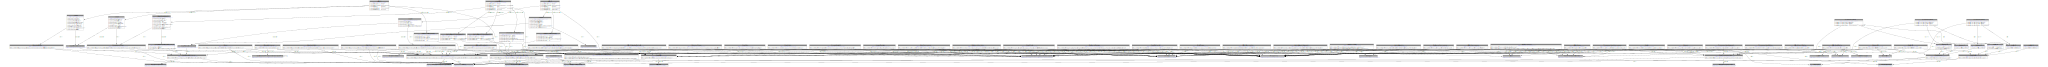

In [6]:
# Load the SVG icon from a file or a URL
svg_file_path = '/content/caps_ontology.svg'


# Load the content of the SVG file
with open(svg_file_path, 'r') as svg_file:
    svg_content = svg_file.read()

# Display the SVG content in Colab
display(SVG(svg_content))


# Export as an `.owl` file, `.ttl` file and `.svg`/ `.rdf` to visualize it 

In [7]:
# Load the Turtle file
turtle_file = turtle_code
g = rdflib.Graph()
g.parse(data=turtle_file, format='turtle')

# Convert and save as an OWL file (in RDF/XML format)
owl_file = '/content/owl_file.owl'
g.serialize(destination=owl_file, format='xml')


<Graph identifier=N7cb67a26e9904bfbbc78f1755fba2d82 (<class 'rdflib.graph.Graph'>)>

In [8]:
# Create the Output directory if it doesn't exist
if not os.path.exists('Output'):
    os.makedirs('Output')

# Load the Turtle file
turtle_file = turtle_code
g = rdflib.Graph()
g.parse(data=turtle_file, format='turtle')

# Convert and save as an OWL file (in RDF/XML format)
owl_file = 'Output/Caps_ontology.owl'
g.serialize(destination=owl_file, format='xml')

# Export the Turtle file in .ttl format
ttl_file = 'Output/Caps_ontology_turtle_file.ttl'
g.serialize(destination=ttl_file, format='turtle')


# Export the Turtle file in .rdf format
rdf_file = 'Output/Caps_ontology_turtle_file.rdf'
g.serialize(destination=rdf_file, format='json-ld')



# Load the Turtle code into an rdflib Graph
g = rdflib.Graph()
g.parse(data=turtle_code, format="turtle")

# Convert the RDF graph to a Graphviz dot format
dot_text = StringIO()
rdf2dot(g, dot_text)

# Create the source object with custom attributes
src = Source(dot_text.getvalue())

# Convert the dot format to an SVG and save it to a file
src.render("Output/Caps_ontology_SVGgraph", format="svg")


'Output/Caps_ontology_SVGgraph.svg'

# Documentation


---



## 1. Introduction

### a) Brief overview of the turtle code:

The turtle code provided represents an ontology for **caps**, which is a **type of headwear designed for various purposes such as fashion, protection from the sun, or as part of a uniform**. The ontology defines the different classes of caps, such as `baseball caps`, `beanies`, `flat caps`, `snapback caps`, `bucket hats`, and `visors`, and the properties that describe them, such as `cap size`, `color`, `material`, `closure type`, `style`, and `logo design`. The ontology also includes classes for `cap offers`, `cap deliveries`, `cap manufacturers`, `cap buyers`, `cap sellers`, and `cap transactions`.

### b) Explanation of the RDF and Turtle syntax:
**The Resource Description Framework (RDF)** is a standard for representing data on the web, and is used to describe resources and their relationships. RDF data is represented in **triples**, which consist of a **subject**, a **predicate**, and an **object**. The subject is the resource being described, the predicate is the property or relationship of the resource, and the object is the value of the property or the related resource.

**Turtle** is a syntax for **writing RDF data** in a more readable format than the standard RDF/XML syntax. Turtle uses prefixes to shorten URIs, and allows for blank nodes to be used as placeholders for resources that are not identified by a **URI**. Turtle also supports commenting, which can be used to add additional information or context to the data.

---

## 2. Namespace Definitions

###a) Explanation of the namespace prefixes used in the code:

The turtle code provided in the beginning of this google colab uses several **namespace prefixes**, which are **shorthand notations for full URIs** (Uniform Resource Identifiers) that identify resources such as classes and properties in an ontology. These prefixes are defined using the `@prefix` keyword followed by the prefix name and the URI it represents. The most commonly used namespace prefixes in this code are:

*   **rdf**: Used to represent the RDF (Resource Description Framework) namespace. RDF is a standard model for data interchange on the web.

*   **rdfs**: Used to represent the RDFS (RDF Schema) namespace. RDFS provides vocabulary for describing classes and properties in RDF data.

*   **xsd**: Used to represent the XSD (XML Schema) namespace. XSD provides a set of data types for use in XML and RDF data.

*   **gr**: Used to represent the GoodRelations ontology namespace. GoodRelations is an ontology for describing products and services in e-commerce.

*   **cap**: Used to represent a custom namespace for the ontology being defined in this code. This namespace is used to define classes and properties related to caps.

###b) Description of each namespace's purpose and relevant information:

*   **RDF**: The RDF namespace is used to define the basic elements of RDF data, such as subjects, predicates, and objects. It provides a standard syntax and vocabulary for expressing data on the web.

*   **RDFS**: The RDFS namespace provides vocabulary for describing classes and properties in RDF data. It defines concepts such as subclasses, subproperties, and domains and ranges of properties. It is often used in conjunction with RDF to create more complex ontologies.

*   **XSD**: The XSD namespace provides a set of data types for use in XML and RDF data. It includes data types such as string, integer, and float, which are used to define the range of properties in an ontology.

*   **GoodRelations**: The GoodRelations ontology provides a standardized vocabulary for describing products and services in e-commerce. It includes concepts such as Product, Offer, and PriceSpecification, which can be used to create detailed product listings and pricing information.

*   **Custom Namespace**: The custom namespace defined in this code (cap) is used to define classes and properties specific to caps. This includes classes such as BaseballCap and Beanie, and properties such as CapColor and CapSize. By defining these concepts in a custom namespace, the ontology can be more easily extended and reused for other purposes.

---

##3. Cap Ontology

### a) Explanation of the Cap Ontology and its purpose:

The Cap Ontology is an ontology designed to represent information related to different types of caps and their characteristics, such as size, color, material, closure type, style, logo design, and delivery method. The ontology is intended to provide a standardized and structured way to describe caps, allowing for easier search, retrieval, and analysis of cap-related data. It can be used by retailers, manufacturers, and consumers to represent, compare, and analyze different types of caps based on their attributes.

### b) Description of the classes in the ontology:

The Cap Ontology consists of several classes, each representing a specific type of cap or cap-related concept. These classes include:

*   `Cap`: The main class representing any type of cap.

*   `BaseballCap`: A subclass of Cap representing a type of cap with a rounded crown and a stiff bill projecting in front.

*   `Beanie`: A subclass of Cap representing a type of cap that fits closely to the head, usually made of a knit material.

*   `FlatCap`: A subclass of Cap representing a type of cap with a rounded, flat crown and a short, stiff brim in front.

*   `SnapbackCap`: A subclass of Cap representing a type of cap with a flat, wide brim and an adjustable snap closure at the back.

*   `BucketHat`: A subclass of Cap representing a type of hat with a wide, downward-sloping brim and a soft, rounded crown.

*   `Visor`: A subclass of Cap representing a type of cap with a wide brim in front to shield the eyes from the sun.

*   `CapManufacturer`: A subclass of BusinessEntity representing the company or entity that manufactures the cap.

*   `CapOffer`: A subclass of Offering representing an offer for a cap or combination of caps.

*   `CapTransaction`: A subclass of BusinessFunction representing a transaction involving the purchase of a cap.

*   `CapDeliveryMethod`: A subclass of DeliveryMethod representing a method for delivering caps.

### c) Description of the properties in the ontology:

The Cap Ontology also includes several properties, each representing a specific attribute of caps or cap-related concepts. These properties include:

*   `CapSize`: A property representing the size of a cap, such as small, medium, or large.

*   `CapColor`: A property representing the color of a cap, such as red, blue, or black.
*   `CapMaterial`: A property representing the material of a cap, such as cotton, polyester, or wool.
*   `ClosureType`: A property representing the type of closure used in a cap, such as snapback, buckle, or fitted.
*   `CapStyle`: A property representing the specific style of a cap, such as trucker, flat-brim, or dad cap.
*   `LogoDesign`: A property representing the design or logo featured on a cap.
*   `Installments`: A property representing the number of installments for a multiple payment option.
*   `InstallmentAmount`: A property representing the amount to be paid in each installment for a multiple payment option.
*   `DeliveryTime`: A property representing the estimated delivery time for a cap, in days.
*   `DeliveryCost`: A property representing the cost of the delivery method for a cap, in the currency of the country where the product is sold.
*   `DeliveryCurrency`: A property representing the currency of the delivery cost.
*   `DeliveryService`: A property representing the service or company responsible for the delivery of the cap.
*   `Manufacturer`: A property representing the manufacturer of a cap.
*   `OfferPrice`: A property representing the price of the cap offer.
*   `OfferCurrency`: A property representing the currency of the cap offer price.
*   `OfferWarranty`: A property representing the warranty information for the cap offer, in months or years.
*   `OfferShippingDetails`: A property representing the shipping details for the cap offer, such as shipping method, delivery time, and cost.
*   `OfferedProduct`: A property representing the cap or caps included in a cap offer.
*   `OfferStartDate`: A property representing the start date of a cap offer.
*   `OfferEndDate`: A property representing the end date of a cap offer.
*   `TransactionDate`: A property representing the date when a cap transaction took place.
*   `TransactionAmount`: A property representing the total amount paid in a cap transaction.
*   `TransactionCurrency`: A property representing the currency of a cap transaction amount.
*   `Buyer`: A property representing the buyer.

*   `Seller`: A property representing the seller.

*    `InstallmentPriceSpecification`: A class representing a price specification for offerings with multiple payment installments. 

*     `Installments`: A property representing the number of installments for a multiple payment option.

*      `InstallmentAmount`: A property representing the amount to be paid in each installment for a multiple payment option.

*       `BrimType`: A property representing the type of brim on a cap, such as flat or curved. 

*       `CrownHeight`: A property representing the height of the crown on a cap, such as high, mid, or low profile.

*       `DeliveryRange`: A property representing the geographical range within which a cap can be delivered, such as local, national, or international. 

---

## 4. Class definitions

### a) Detailed explanation of each class in the ontology:

*   `cap:Cap`: This class represents the general concept of a cap, which is a type 
of headwear designed for various purposes, such as fashion, protection from the sun, or as part of a uniform.
*   `cap:BaseballCap`: This class represents a specific type of cap with a rounded crown and a stiff bill projecting in front, commonly used in baseball and other sports.
*   `cap:Beanie`: This class represents a specific type of cap that fits closely to the head, usually made of a knit material and commonly used in cold weather.
*   `cap:FlatCap`: This class represents a specific type of cap with a rounded, flat crown and a short, stiff brim in front, commonly used in casual and formal settings.
*   `cap:SnapbackCap`: This class represents a specific type of cap with a flat, wide brim and an adjustable snap closure at the back, commonly used in casual and streetwear fashion.
*   `cap:BucketHat`: This class represents a specific type of hat with a wide, downward-sloping brim and a soft, rounded crown, commonly used in outdoor and beach activities.
*   `cap:Visor`: This class represents a specific type of cap with a wide brim in front to shield the eyes from the sun, commonly used in sports and outdoor activities.
*   `cap:InstallmentPriceSpecification`: This class represents a price specification for offerings with multiple payment installments.
*   `cap:Delivery`: This class represents a delivery method for caps.
*   `cap:Manufacturer`: This class represents the company or entity that manufactures the cap.
*   `cap:CapOffer`: This class represents an offer for a cap or combination of caps.
*   `cap:DeliveryMethod`: This class represents a specific delivery method for caps.
*   `cap:CapTransaction`: This class represents a transaction involving the purchase of a cap.
*   `cap:Buyer`: This class represents a person who buys caps.
*   `cap:Seller`: This class represents an organization that sells caps.
### b) Examples of instances for each class:

*   `cap:BaseballCap` instance: New Era 59FIFTY New York Yankees Baseball Cap
*   `cap:Beanie` instance: Carhartt Acrylic Watch Beanie
*   `cap:FlatCap` instance: Brixton Brood Newsboy Cap
*   `cap:SnapbackCap` instance: Adidas Originals Trefoil Snapback Cap
*   `cap:BucketHat` instance: The North Face Sun Stash Reversible Bucket Hat
*   `cap:Visor` instance: Nike Aerobill Featherlight Visor
*   `cap:InstallmentPriceSpecification` instance: PayBright Installment Plan for Caps
*   `cap:CapDelivery` instance: FedEx Standard Shipping
*   `cap:CapManufacturer` instance: New Era Cap Company
*   `cap:CapOffer` instance: Buy One Get One 50% Off on All Caps
*   `cap:CapDeliveryMethod` instance: USPS Priority Mail
*   `cap:CapTransaction` instance: John Smith purchased a New Era 59FIFTY New York Yankees Baseball Cap from a store in New York City.
*   `cap:CapBuyer` instance: Jane Doe, who regularly buys caps for her personal collection.
*   `cap:CapSeller` instance: Lids, a company that sells a variety of caps online and in physical stores.

### c) Hierarchy of classes and their relationships:

In this ontology, the class definitions form a hierarchical structure, where each class is a subclass of a more general class. The main class in this hierarchy is `gr:ProductOrServiceModel`, which is a general category for products and services. The cap-related classes in this ontology are subclasses of "gr:ProductOrServiceModel".

The first subclass is `cap:Cap`, which represents a general category of headwear designed for various purposes, such as fashion, protection from the sun, or as part of a uniform. `cap:Cap` has five subclasses: `cap:BaseballCap`, `cap:Beanie`, `cap:FlatCap`, `cap:SnapbackCap`, and `cap:BucketHat`. These subclasses represent specific styles of caps with their unique characteristics.

we also added the following classes:

*    `cap:CapDeliveryMethod`: A class representing the method of delivery for caps.

*    `cap:Manufacturer`: A class representing the manufacturer of a cap.

*    `cap:Offer`: A class representing an offer for caps.

*    `cap:Transaction`: A class representing a transaction involving caps.

*    `cap:Buyer`: A class representing the buyer of a cap.

*    `cap:Seller`: A class representing the seller of a cap.

Furthermore, each of the cap subclasses has specific properties that define them, such as `cap:ClosureType` and `cap:CapStyle`. These properties have values that are defined for each subclass of `cap:Cap`. Additionally, there are properties such as `cap:CapSize`, `cap:CapColor`, and `cap:CapMaterial` that are common to all subclasses of "cap:Cap" and define general cap attributes.

The hierarchy of classes and their relationships in this ontology is shown below:

*   gr:ProductOrServiceModel
>* cap:Cap
>>* cap:BaseballCap
>>* cap:Beanie
>>* cap:FlatCap
>>* cap:SnapbackCap
>>* cap:BucketHat
>* cap:InstallmentPriceSpecification
>* cap:CapDeliveryMethod
>* cap:Manufacturer
>* cap:Offer
>* cap:Transaction
>* cap:Buyer
>* cap:Seller

Overall, this hierarchical structure provides a clear organization of cap-related concepts, making it easier to categorize and analyze different types of caps and cap-related information.

---

## 5. Property definitions

### a) Detailed explanation of each property in the ontology:

*   `cap:CapSize` - Represents the size of a cap, such as small, medium, or large.
*   `cap:CapColor` - Represents the color of a cap, such as red, blue, or black.

*   `cap:CapMaterial` - Represents the material of a cap, such as cotton, polyester, or wool.

*   `cap:InstallmentPriceSpecification` - Represents a price specification for offerings with multiple payment installments.

*   `cap:installments` - Represents the number of installments for a multiple payment option.

*   `cap:installmentAmount` - Represents the amount to be paid in each installment for a multiple payment option.

*   `cap:CapDelivery` - Represents a class for cap delivery.

*   `cap:closureType` - Represents the type of closure used in a cap, such as snapback, buckle, or fitted.

*   `cap:CapStyle` - Represents the specific style of a cap, such as trucker, flat-brim, or dad cap.

*   `cap:LogoDesign` - Represents the design or logo featured on a cap.

*   'cap:CapDeliveryMethod' - Represents the specific delivery method for caps, such as standard shipping, expedited shipping, or pickup in-store.

*   `cap:deliveryTime` - Represents the estimated delivery time for a cap, in days.

*   `cap:deliveryCost` - Represents the cost of the delivery method for a cap, in the currency of the country where the product is sold.

*   `cap:CapManufacturer` - Represents the company or entity that manufactures the cap.

*   `cap:manufacturer` - Represents the manufacturer of a cap.

*   `cap:CapOffer` - Represents an offer for a cap or combination of caps.

*   `cap:offerPrice` - Represents the price of the cap offer.

*   `cap:offerCurrency` - Represents the currency of the cap offer price.

*   `cap:offerWarranty` - Represents the warranty information for the cap offer, in months or years.

*   `cap:offerShippingDetails` - Represents the shipping details for the cap offer, such as shipping method, delivery time, and cost.

*   `cap:offeredProduct` - Represents the cap or caps included in the offer.

*   `cap:offerStartDate` - Represents the start date of the cap offer.

*   `cap:offerEndDate` - Represents the end date of the cap offer.

*   `cap:CapDeliveryMethod` - Represents a method for delivering caps.

*   `cap:deliveryTime` - Represents the estimated time for the delivery of the cap, in days.

*   `cap:deliveryCost` - Represents the cost of delivering the cap.

*   `cap:deliveryCurrency` - Represents the currency of the delivery cost.

*   `cap:deliveryService` - Represents the service or company responsible for the delivery of the cap.

*   `cap:CapTransaction` - Represents a transaction involving the purchase of a cap.

*   `cap:transactionDate` - Represents the date when the cap transaction took place.

*   `cap:transactionAmount` - Represents the total amount paid in the cap transaction.

*   `cap:transactionCurrency` - Represents the currency of the transaction amount.

*   `cap:buyer` - Represents the buyer involved in the cap transaction.

*   cap:seller` - Represents the seller involved in the cap transaction.

*   `cap:CapBuyer` - Represents a person who buys caps.

*   `cap:buyerID` - Represents a unique identifier for the cap buyer.

*   `cap:CapSeller` - Represents an organization that sells caps.

*   `cap:sellerID` - Represents a unique identifier for the cap seller

*   `cap:installments` - Represents the number of installments for a multiple payment option.

*   `cap:installmentAmount` - Represents the amount to be paid in each installment for a multiple payment option.

*   `cap:brimType` - Represents the type of brim on a cap, such as flat or curved.

*   `cap:crownHeight` - Represents the height of the crown on a cap, such as high, mid, or low profile.

*   `cap:deliveryRange` - Represents the geographical range within which a cap can be delivered, such as local, national, or international.

### b) Domain and range of each property:

The domain of a property specifies the class to which the property applies, while the range of a property specifies the class or datatype of the values that the property can take. In the given ontology, the domain and range of each property are defined using the rdfs:domain and rdfs:range properties, respectively.

Here is a list of properties along with their domain and range:

*   `cap:CapSize` - Domain: cap:Cap - Range: xsd:string
*   `cap:CapColor` - Domain: cap:Cap - Range: xsd:string
*   `cap:CapMaterial` - Domain: cap:Cap - Range: xsd:string

*   `cap:InstallmentPriceSpecification` - Domain: Cap:InstallmentPriceSpecification - Range: xsd:integer

*   `cap:installments` - Domain: cap:InstallmentPriceSpecification - Range: xsd:float

*   `cap:installmentAmount` - Domain: cap:InstallmentPriceSpecification - Range: xsd:float

*   `cap:CapDelivery` - Domain: cap:CapDelivery - Range: None (Class)

*   `cap:closureType` - Domain: cap:Cap - Range: xsd:string

*   `cap:CapStyle` - Domain: cap:Cap - Range: xsd:string

*   `cap:LogoDesign` - Domain: cap:Cap - Range: xsd:string

*   `cap:CapDeliveryMethod` - Domain: cap:CapDeliveryMethod - Range: None (Class)

*   `cap:deliveryTime` - Domain: cap:CapDeliveryMethod - Range: xsd:integer

*   `cap:deliveryCost` - cap:deliveryCost - Domain: cap:CapDeliveryMethod
Range: xsd:float

*   `cap:CapManufacturer` - Domain: cap:Cap - Range: cap:CapManufacturer

*   `cap:manufacturer` - Domain: cap:CapOffer - Range: None (Class)

*   `cap:CapOffer` - Domain: cap:CapOffer - Range: None (Class)
*   `cap:offerPrice` - Domain: cap:CapOffer - Range: xsd:float
*   `cap:offerCurrency` - Domain: cap:CapOffer - Range: xsd:string
*   `cap:offerWarranty` - Domain: cap:CapOffer - Range: xsd:string

*   `cap:offerShippingDetails` - Domain: cap:CapOffer - Range: cap:CapDeliveryMethod

*   `cap:offeredProduct` - Domain: cap:CapOffer - Range: cap:Cap

*   `cap:offerStartDate` - Domain: cap:CapOffer - Range: xsd:date
*   `cap:offerEndDate` - Domain: cap:CapOffer - Range: xsd:date

*   `cap:CapDeliveryMethod` Domain CapDeliveryMethod - Range: gr:DeliveryMethod .

*   `cap:deliveryTime` - Domain: cap:CapDeliveryMethod- Range: xsd:integer

*   `cap:deliveryCost` - Domain: cap:CapDeliveryMethod- Range is xsd:float.

*   `cap:deliveryCurrency` - Domain: cap:CapDeliveryMethod - Range is xsd:string
*   `cap:deliveryService` - Represents the service or company responsible for the delivery of the cap.

*   `cap:CapTransaction` - Domain: cap:CapTransaction - Range: None (Class)

*   `cap:transactionDate` - Domain: cap:CapTransaction - Range: xsd:date

*   `cap:transactionAmount` - Domain: cap:CapTransaction - Range: xsd:float

*   `cap:transactionCurrency` - Domain: cap:CapTransaction - Range: xsd:string

*   `cap:CapBuyer` - Domain: cap:CapTransaction - Range: schema:Person

*   `cap:buyerID` - Domain : cap:CapBuyer - Range: xsd:string

*   `cap:CapSeller` - Domain: cap:CapTransaction - Range: schema:Person

*   `cap:sellerID` - cap:CapSeller - Range: xsd:string

*   `cap:installments` - Domain: cap:InstallmentPriceSpecification - Range: xsd:integer

*   `cap:installmentAmount` - Domain: cap:InstallmentPriceSpecification - Range: xsd:float

*   `cap:brimType` - Domain: cap:Cap - Range: xsd:string

*   `cap:crownHeight` - Domain: cap:Cap - Range: xsd:string

*   `cap:deliveryRange` - Domain: cap:CapDeliveryMethod - Range: xsd:string

### c) Examples 



*   cap:Cap properties

```

cap:ExampleCap a cap:Cap ;
    cap:CapSize "M" ;
    cap:CapColor "Blue" ;
    cap:CapMaterial "Cotton" ;
    cap:closureType "Snapback" ;
    cap:CapStyle "Baseball" ;
    cap:LogoDesign "Eagle" .
```

*   cap:InstallmentPriceSpecification properties

```

cap:ExampleInstallmentPriceSpecification a cap:InstallmentPriceSpecification ;
    cap:installments 12 ;
    cap:installmentAmount 10.00 .

```

*   cap:CapDelivery properties

```
cap:ExampleCapDelivery a cap:CapDelivery .
```

*   cap:CapDeliveryMethod properties

```

cap:ExampleCapDeliveryMethod a cap:CapDeliveryMethod, gr:DeliveryMethod ;
    cap:deliveryTime 3 ;
    cap:deliveryCost 5.99 ;
    cap:deliveryCurrency "USD" ;
    cap:deliveryService "FedEx" .
```

*   cap:CapManufacturer properties

```
cap:ExampleCapManufacturer a cap:CapManufacturer .
```

*  cap:CapOffer properties 

```


cap:ExampleCapOffer a cap:CapOffer ;
    cap:offerPrice 59.99 ;
    cap:offerCurrency "USD" ;
    cap:offerWarranty "1 Year" ;
    cap:offerShippingDetails cap:ExampleCapDeliveryMethod ;
    cap:offeredProduct cap:ExampleCap ;
    cap:offerStartDate "2023-04-01"^^xsd:date ;
    cap:offerEndDate "2023-04-30"^^xsd:date .
```

*  cap:CapOffer properties 

```
# cap:CapTransaction properties
cap:ExampleCapTransaction a cap:CapTransaction ;
    cap:transactionDate "2023-04-19"^^xsd:date ;
    cap:transactionAmount 59.99 ;
    cap:transactionCurrency "USD" .
```

*  cap:CapBuyer properties

```
cap:ExampleCapBuyer a cap:CapBuyer, schema:Person ;
    cap:buyerID "Buyer_123" .
```

*  cap:CapSeller properties

```
cap:ExampleCapSeller a cap:CapSeller, schema:Person ;
    cap:sellerID "Seller_456" .
```

*  Associating buyers, sellers, and manufacturers with transactions and offers

```
cap:ExampleCapTransaction cap:CapBuyer cap:ExampleCapBuyer ;
    cap:CapSeller cap:ExampleCapSeller .
cap:ExampleCap cap:CapManufacturer cap:ExampleCapManufacturer .
```

---

##6. Cap Offer and transaction

Cap Offer and Transaction
This section will provide an overview of the `Cap Offer` and `Cap Transaction` classes, explain their **properties** and **relationships**, and give *examples* of cap offers and transactions.



###a) Explanation of the Cap Offer and Cap Transaction classes

The `Cap Offer` class represents an **offer** for a cap or a **combination of caps**. This class is a **subclass** of the `gr:Offering` class from the **GoodRelations** ontology. Cap Offer provides essential information about the offer, including the `price`, `currency`, `warranty`, `shipping details`,` offered products`, and the `offer's start` and `end dates`.

The `Cap Transaction` class represents a transaction involving the **purchase of a cap**. It is a subclass of the `gr:BusinessFunction` class from the **GoodRelations** ontology. This class stores information about the date, amount, and currency of the transaction, as well as details about the **buyer** and **seller** involved in the **transaction**.

###b) Description of their properties and relationships

Cap Offer properties:

*   `offerPrice`: The price of the cap offer (xsd:float).
*   `offerCurrency`: The currency of the cap offer price (xsd:string).
*   `offerWarranty`: The warranty information for the cap offer, in months or years (xsd:string).
*   `offerShippingDetails`: The shipping details for the cap offer, represented by the CapDeliveryMethod class.
*   `offeredProduct`: The cap or caps included in the offer, represented by the Cap class.
*   `offerStartDate`: The start date of the cap offer (xsd:date).
*   `offerEndDate`: The end date of the cap offer (xsd:date).

**Cap Transaction properties:**

*   `transactionDate`: The date when the cap transaction took place (xsd:date).
*   `transactionAmount`: The total amount paid in the cap transaction (xsd:float).
*   `transactionCurrency`: The currency of the transaction amount (xsd:string).
buyer: The buyer involved in the cap transaction, represented by the CapBuyer class (a subclass of schema:Person).
*   `seller`: The seller involved in the cap transaction, represented by the CapSeller class (a subclass of schema:Organization).


###c) Examples of cap offers and transactionsAdditional properties and relationships

**Installment Price Specification:**

* `installments`: The number of installments for a multiple payment option (Domain: cap:InstallmentPriceSpecification, Range: xsd:integer).
* `installmentAmount`: The amount to be paid in each installment for a multiple payment option (Domain: cap:InstallmentPriceSpecification, Range: xsd:float).

**Cap properties**:
* `brimType`: The type of brim on a cap, such as flat or curved (Domain: cap:Cap, Range: xsd:string).
* `crownHeight`: The height of the crown on a cap, such as high, mid, or low profile (Domain: cap:Cap, Range: xsd:string).

**Cap Delivery Method properties**:
* `deliveryRange`: The geographical range within which a cap can be delivered, such as local, national, or international (Domain: cap:CapDeliveryMethod, Range: xsd:string).

###d) Examples of cap offers and transactions

**Example 1: Cap Offer**

A cap offer for a snapback cap with a price of `$25` in USD, a 1-year warranty, and standard shipping with a delivery time of 5 days and a cost of `$5`:

```
SnapbackOffer1 a cap:CapOffer ;
    cap:offerPrice "25"^^xsd:float ;
    cap:offerCurrency "USD" ;
    cap:offerWarranty "1 year" ;
    cap:offerShippingDetails :StandardShipping ;
    cap:offeredProduct :SnapbackCap1 ;
    cap:offerStartDate "2023-04-20"^^xsd:date ;
    cap:offerEndDate "2023-04-30"^^xsd:date .

```

**Example 2: Cap Transaction**

A cap transaction for the purchase of the snapback cap from Example 1, with a transaction date of `April 21, 2023`, a total amount paid of `$30` in USD, and involving a buyer and a seller:

```

SnapbackTransaction1 a cap:CapTransaction ;
    cap:transactionDate "2023-04-21"^^xsd:date ;
    cap:transactionAmount "30"^^xsd:float ;
    cap:transactionCurrency "USD" ;
    cap:buyer :Buyer1 ;
    cap:seller :Seller1 .
```

---

##7. Cap Buyer and Cap Seller

###a) Explanation of the Cap Buyer and Cap Seller classes

The `Cap Buyer` and `Cap Seller` classes are subclasses of `schema:Person` and `schema:Organization`, respectively. They *represent* distinct *roles* in the cap industry, with **Cap Buyers** being individuals who **purchase caps** and **Cap Sellers** being organizations that **sell caps**.

*   `Cap Buyer`: A person who **buys caps**, often for personal use, collection, or gifting purposes. Cap Buyers can have various preferences in terms of cap `types`, `sizes`, `colors`, `materials`, and `styles`.

*    `Cap Seller`: An organization that **sells caps**, which can range from small retailers to large online platforms or specialized cap stores. Cap Sellers offer a variety of caps and may target specific segments of the cap market, such as sports teams, fashion trends, or custom designs.

###b) Description of their properties and relationships

*Cap Buyer properties*:

*    `buyerID`: A **unique identifier** for the cap buyer, represented as an *xsd:string*. This property helps in uniquely identifying each buyer in the system.
Cap Seller properties:

*    `sellerID`: A **unique identifier** for the cap seller, represented as an *xsd:string*. This property helps in uniquely identifying each seller in the system.

*Relationships*:

*     `cap:buyer`: A property that connects the Cap Transaction class to the Cap Buyer class. It represents the buyer involved in a cap transaction.

*      `cap:seller`: A property that connects the Cap Transaction class to the Cap Seller class. It represents the seller involved in a cap transaction.

###c) Examples of cap buyers and sellers

*Example 1*:

**Cap Buyer**:

buyerID: "B12345"
*   Name: "John Smith"
*   Preferences: Baseball caps, snapback caps, team logos



```
cap:CapBuyerB12345 a cap:CapBuyer ;
    cap:buyerID "B12345" ;
    cap:name "John Smith" ;
    cap:preferences "Baseball caps, snapback caps, team logos" .
```


**Cap Seller**:

sellerID: "S67890"
*   Name: "Caps R' Us"
*   Description: "An online store specializing in sports team caps and custom designs."

```
cap:CapSellerS67890 a cap:CapSeller ;
    cap:sellerID "S67890" ;
    cap:name "Caps R' Us" ;
    cap:description "An online store specializing in sports team caps and custom designs." .

```

*Example 2*:

**Cap Buyer**:

buyerID: "B54321"
*    Name: "Jane Doe"
*    Preferences: Beanies, bucket hats, minimalist designs
```
cap:CapBuyerB54321 a cap:CapBuyer ;
    cap:buyerID "B54321" ;
    cap:name "Jane Doe" ;
    cap:preferences "Beanies, bucket hats, minimalist designs" .
```

**Cap Seller**:

sellerID: "S09876"
*   Name: "Trendy Caps"
*   Description: "A boutique store offering a curated selection of fashionable and stylish caps."

```
cap:CapSellerS09876 a cap:CapSeller ;
    cap:sellerID "S09876" ;
    cap:name "Trendy Caps" ;
    cap:description "A boutique store offering a curated selection of fashionable and stylish caps." .
```

---

## 8. Examples 

In this section, we provide sample Turtle code examples to demonstrate the usage of the Cap Ontology. Each example is followed by an explanation of the classes and properties used in the example.

*Example 1*: Creating a Cap instance

```
@prefix cap: <http://example.org/caps#> .
@prefix ex: <http://example.org/example#> .

ex:Cap1 a cap:BaseballCap ;
    cap:CapSize "Medium" ;
    cap:CapColor "Blue" ;
    cap:CapMaterial "Cotton" ;
    cap:closureType "Snapback" ;
    cap:CapStyle "Trucker" ;
    cap:LogoDesign "NY Yankees" .

```

In this example, we create an instance of a Baseball Cap (cap:BaseballCap) with the following properties:

*   Cap Size: Medium
*   Cap Color: Blue
*   Cap Material: Cotton
*   Closure Type: Snapback
*   Cap Style: Trucker
*   Logo Design: NY Yankees

*Example 2*: Creating a CapOffer instance

```
@prefix cap: <http://example.org/caps#> .
@prefix ex: <http://example.org/example#> .

ex:CapOffer1 a cap:CapOffer ;
    cap:offerPrice "29.99" ;
    cap:offerCurrency "USD" ;
    cap:offerWarranty "1 Year" ;
    cap:offeredProduct ex:Cap1 ;
    cap:offerStartDate "2023-04-19" ;
    cap:offerEndDate "2023-04-30" .
```

In this example, we create an instance of a Cap Offer (cap:CapOffer) with the following properties:

*   Offer Price: 29.99
*   Offer Currency: USD
*   Offer Warranty: 1 Year
*   Offered Product: Cap1 (instance from Example 1)
*   Offer Start Date: 2023-04-19
*   Offer End Date: 2023-04-30

*Example 3*: Creating a CapDeliveryMethod instance

```
@prefix cap: <http://example.org/caps#> .
@prefix ex: <http://example.org/example#> .

ex:DeliveryMethod1 a cap:CapDeliveryMethod ;
    cap:deliveryTime 3 ;
    cap:deliveryCost "4.99" ;
    cap:deliveryCurrency "USD" ;
    cap:deliveryService "FedEx" .
```
In this example, we create an instance of a Cap Delivery Method (cap:CapDeliveryMethod) with the following properties:

*   Delivery Time: 3 days
*   Delivery Cost: 4.99
*   Delivery Currency: USD
*   Delivery Service: FedEx

*Example 4*: Creating a CapBuyer instance

```
@prefix cap: <http://example.org/caps#> .
@prefix ex: <http://example.org/example#> .

ex:Buyer1 a cap:CapBuyer ;
    cap:buyerID "B12345" ;
    schema:name "John Doe" .

```

In this example, we create an instance of a Cap Buyer (cap:CapBuyer) with the following properties:

*   Buyer ID: B12345
*   Name: John Doe

---

## 9. Use cases 

These examples showcase how to use the **Cap Ontology** to represent various aspects of caps, their offers, delivery methods, and the people involved in their transactions. The ontology can be further extended and utilized in various applications related to caps, such as e-commerce platforms and inventory management systems.

The cap ontology can be used in various scenarios, including e-commerce websites selling caps, inventory management systems, and manufacturing processes. Below are some potential use cases for the cap ontology:

*    E-commerce websites:
The cap ontology can be used to improve the search and filtering capabilities of e-commerce websites selling caps. By adding cap-specific properties such as cap size, color, style, material, closure type, and logo design, customers can easily find the specific cap they are looking for.

*    Inventory management systems:
The cap ontology can be used to keep track of the inventory of caps, their specific attributes, and delivery information. This will help in optimizing the stock level, reducing stockouts, and ensuring timely delivery.

*    Manufacturing processes:
The cap ontology can be used in the manufacturing process to track the different materials used, their source, and quality. This will help in maintaining the consistency and quality of caps produced.

*    Marketing campaigns:
The cap ontology can be used to target specific customer segments based on their preferences for cap attributes such as size, color, style, and material. This can help in creating targeted marketing campaigns and improving customer engagement.

Overall, the cap ontology can be used in various scenarios to enhance the customer experience, streamline operations, and optimize

--- 

##10. Conclusion

Throughout the documentation, we have explained the *structure*, *classes*, *properties*, and *relationships* of the cap ontology. The ontology captures different types of caps, their attributes, manufacturers, and the related transactions involving buyers and sellers. This allows for a more organized and efficient way of representing and reasoning about cap-related data and information.

The benefits of the cap ontology include:

*    **Standardization**: By adopting the cap ontology, organizations and individuals can use a standardized model for representing cap-related information, facilitating data exchange and integration.

*    **Semantic Understanding**: The cap ontology allows machines to have a better understanding of the cap domain, enabling more sophisticated search, analysis, and reasoning capabilities.

*    **Extensibility**: The cap ontology can be easily extended to include new cap types, attributes, or relationships, allowing it to evolve and adapt to changing requirements and use cases.

*    **Reusability**: The cap ontology leverages existing widely used ontologies, such as GoodRelations (gr) and Schema.org (schema), making it easier to integrate with other domains and applications.

Potential applications of the cap ontology include:

*    **E-commerce Platforms**: Online retailers can use the cap ontology to represent their cap product listings, enabling better search and filtering options for users, as well as facilitating data exchange with other platforms.

*    **Inventory Management Systems**: Businesses can utilize the cap ontology to represent and manage their cap inventory, streamlining operations and providing better insights into product performance.

*     **Recommendation Systems**: By leveraging the cap ontology, recommendation engines can provide more relevant and personalized cap suggestions to users based on their preferences and interests.

*     **Analytics and Reporting**: The cap ontology can be used as a foundation for analyzing cap sales data, identifying trends, and generating reports that can aid in decision-making and strategy planning.

In conclusion, the cap ontology provides a **robust** and **flexible** framework for representing and reasoning about **cap-related information**. With its comprehensive documentation and adherence to widely used standards, it offers numerous benefits and potential applications across various industries and use cases. By following the provided guidelines, users can effectively utilize the cap ontology to enrich their cap-related data and unlock new possibilities in data-driven decision-making.

---

## Download all the files

Launching the following cell will download 4 different files from our ontology:



*   `.ttl` file containing our turtle code
*   `.svg` file to visualize it
*    `.owl` file standard format for ontologies 
*    `.rdf` file of the code
*    `.html` version of the documentation
*    `.pdf` version of the documentation





In [9]:
# Create a zip file of the "Output" directory
shutil.make_archive('Caps_ontology_KRR_Matteo_Boissier_Hugo_Caetano_Louis_Couput_Julien_Seailles', 'zip',"Output")

# Download the zip file
files.download('Caps_ontology_KRR_Matteo_Boissier_Hugo_Caetano_Louis_Couput_Julien_Seailles.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion

Thank you for your time, we hope you enjoyed our ontology ! 

You can access the google colab that we used to build the ontology here :

[`Cap ontology Google colab`](https://colab.research.google.com/drive/1NyaeLXNgeogNpf_8vtqhIkv1n-81mDcv?usp=sharing)